Midterm project: Equity Portfolio Management

Group Members: Shilpa Kuppili, Sathwik Kuchana, Praveen Kumar Govind Reddy

In [ ]:
# Prepare the Data
# Download the historial daily data of the entire 2018 for the 10 stocks
# Retrieve the "Close" and "Adj Close" values for each stock
# Import required libraries

import pandas as pd
import os
import matplotlib.pyplot as plt

universe = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META', 'NFLX', 'TSLA', 'ORCL', 'SAP']

stocks_df = pd.DataFrame()

for data in universe:
    file_name = f"{data}.csv"

    if os.path.exists(file_name):
        df = pd.read_csv(file_name, usecols=['Date', 'Close', 'Adj Close'], parse_dates=['Date'])
        df = df.set_index('Date')
        df.columns = [f'{data}_Close', f'{data}_Adj Close']

        if stocks_df.empty:
            stocks_df = df
        else:
            stocks_df = pd.concat([stocks_df, df], axis=1, join='outer')

# Sort the DataFrame by date
stocks_df.sort_index(inplace=True)

stocks_df.head()


,IBM_Close,IBM_Adj Close,MSFT_Close,MSFT_Adj Close,GOOG_Close,GOOG_Adj Close,AAPL_Close,AAPL_Adj Close,AMZN_Close,AMZN_Adj Close,META_Close,META_Adj Close,NFLX_Close,NFLX_Adj Close,TSLA_Close,TSLA_Adj Close,ORCL_Close,ORCL_Adj Close,SAP_Close,SAP_Adj Close
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02,147.466537,111.800148,85.949997,80.391838,53.250000,53.250000,43.064999,40.776531,59.450500,59.450500,181.419998,181.419998,201.070007,201.070007,21.368668,21.368668,46.630001,42.282444,112.389999,101.210289
2018-01-03,151.520081,114.873291,86.349998,80.765976,54.124001,54.124001,43.057499,40.769417,60.209999,60.209999,184.669998,184.669998,205.050003,205.050003,21.150000,21.150000,47.709999,43.261753,113.309998,102.038773
2018-01-04,154.588913,117.199890,87.110001,81.476830,54.320000,54.320000,43.257500,40.958797,60.479500,60.479500,184.330002,184.330002,205.630005,205.630005,20.974667,20.974667,48.180000,43.687935,115.050003,103.605690
2018-01-05,155.344162,117.772469,88.190002,82.487007,55.111500,55.111500,43.750000,41.425125,61.457001,61.457001,186.850006,186.850006,209.990005,209.990005,21.105333,21.105333,48.470001,43.950901,116.330002,104.758362
2018-01-08,156.281067,118.482773,88.279999,82.571159,55.347000,55.347000,43.587502,41.271263,62.343498,62.343498,188.279999,188.279999,212.050003,212.050003,22.427334,22.427334,48.980000,44.413334,114.800003,103.380562


1. On Jan 02 2018, you split the  $5𝑚 into 5  $1𝑚, and use them to buy 5 stocks from the 10 stocks. For example, IBM close price
 was  $154.25. With  $1𝑚, you can buy max 6482 shares with cost  $999848.5 with  $151.5 cash left. You decided to spend  $1𝑚 on
 each of ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN'] respectively and keep the rest cash into a zero-interest cash account. On
Jan 02 2018, your mark to market value (MTM) is  $5𝑚if combining all stocks value and cash. Your holdings of stocks and
 cach account is your portfolio.

In [ ]:
given_funds = 5000000
stocks_to_buy = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN']
funds_per_stock = 1000000
selected_stocks = {}
MTM = 0

In [ ]:
for stock in stocks_to_buy:
    selected_stocks[stock] = funds_per_stock // stocks_df.loc['2018-01-02'][stock + '_Close']
    given_funds -= (stocks_df.loc['2018-01-02'][stock + '_Close'] * selected_stocks[stock])


cash_account = given_funds
print("The remaining cash is",cash_account)

for stock in stocks_to_buy:
    MTM += selected_stocks[stock] * stocks_df.loc['2018-01-02'][stock + '_Close']

MTM += cash_account

print("The MTM is", MTM)

portfolio = {
    'Date': '2018-01-02',
    'IBM': selected_stocks['IBM'],
    'MSFT': selected_stocks['MSFT'],
    'GOOG': selected_stocks['GOOG'],
    'AAPL': selected_stocks['AAPL'],
    'AMZN': selected_stocks['AMZN'],
    'Cash': given_funds  # The remaining cash is held in the 'Cash' account
}
print("Portfolio of 2018-01-02 is")
print(portfolio)


The remaining cash is 178.71072500036098
The MTM is 5000000.0
Portfolio of 2018-01-02 is
{'Date': '2018-01-02', 'IBM': 6781.0, 'MSFT': 11634.0, 'GOOG': 18779.0, 'AAPL': 23220.0, 'AMZN': 16820.0, 'Cash': 178.71072500036098}


2. Your trading strategy is "5 days rebalancing of buying low". Here is how it works. You keep your portfolio unchanged until 5 days later on Jan 09 2018. Now you want to re-check the market and adjust your portfolio. You will compute the "Adj Close" price changes from Jan 02 to Jan 09, and find the 5 stocks whose "Adj Close" prices dropped the most in terms of percentage. You sell all current holdings on Jan 09 "Close" prices to convert your portfolio to all cash. Then immediately split your cash, including your cash account, to 5 equal parts to buy the 5 stocks that dropped the most from Jan 02 to Jan 09 on 'Adj Close' prices.
You always buy the max shares of stock on the "Close" price and keep the rest cash in cash account. Now the portfolio should be different from 5 days ago. This operation is called "rebalancing".
Selling all of our existing holdings at the closing prices on January 9th and liquidating our portfolio into cash entirely."

In [ ]:
for shares in selected_stocks:
    cash_account += (stocks_df.loc['2018-01-09'][shares + '_Close'] * selected_stocks[shares])
#     print(key)
print("Total Cash left", cash_account)

#Date range for analysis
start_date = '2018-01-02'
end_date = '2018-01-09'


In [ ]:
# Calculate the percentage drop for each stock
stock_performance = {}
for stock_symbol in universe:
    stock_performance[stock_symbol] = (stocks_df.loc[start_date][stock_symbol + '_Adj Close'] - stocks_df.loc[end_date][stock_symbol + '_Adj Close']) / stocks_df.loc[start_date][stock_symbol + '_Adj Close']

# Sort stocks by their performance and select the top 5
less_performing_stocks = sorted(stock_performance, key=stock_performance.get, reverse=True)[:5]

print("Stocks to buy based on the largest percentage drop:", less_performing_stocks)

stocks_to_buy = ['AAPL', 'SAP', 'MSFT', 'META', 'GOOG']
cash_per_stock = cash_account / len(stocks_to_buy)
selected_stocks = {}
# MTM = 0

In [ ]:
for stock in stocks_to_buy:
    selected_stocks[stock] = cash_per_stock // stocks_df.loc['2018-01-09'][stock + '_Close']
    cash_account -= (stocks_df.loc['2018-01-09'][stock + '_Close'] * selected_stocks[stock])

print(cash_account)

portfolio = {
    'Date': '2018-01-09',
    'AAPL': selected_stocks['AAPL'],
    'SAP': selected_stocks['SAP'],
    'MSFT': selected_stocks['MSFT'],
    'META': selected_stocks['META'],
    'GOOG': selected_stocks['GOOG'],
    'Cash': cash_account  # The remaining cash is held in the 'Cash' account
}
print("Portfolio of 2018-01-09 is")
print(portfolio)


Total Cash left 5192835.125283001
Stocks to buy based on the largest percentage drop: ['AAPL', 'SAP', 'MSFT', 'META', 'GOOG']
166.10426300088875
Portfolio of 2018-01-09 is
{'Date': '2018-01-09', 'AAPL': 23829.0, 'SAP': 9097.0, 'MSFT': 11772.0, 'META': 5528.0, 'GOOG': 18776.0, 'Cash': 166.10426300088875}


In [ ]:
def calculate_dividend(stocks_df, selected_stocks, date):
    dividend = 0
    for data, shares in selected_stocks.items():
        col_name = f"{data}_Dividend"
        if col_name in stocks_df.columns:
#             print("entered")
            if not pd.isnull(stocks_df.at[date, col_name]):
#                 print("entered_again")
                dividend += shares * stocks_df.at[date, col_name]

    return dividend

3. Corporations generally issue stock dividends on some days. The total dividend you get on such a day is the stock dividend times your shares if you have shares of this stock on the dividend day. If you buy shares on the dividend day, these bought shares are not qualified to get dividend. If you sell shares on the dividend day, the sold shares are qualified to get dividend. For example, on 2/8/2018, IBM issued $1.5 dividend per share. In your cash account, you will automatically get


In [ ]:
universe = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META', 'NFLX', 'TSLA', 'ORCL', 'SAP']

stocks_df_dates = stocks_df.index.tolist()
# print(stocks_df_dates)

for data in universe:

    universe = pd.read_csv(f"{data}.csv")

    Date = []
    Dividend = []

    #calculating ratios
    universe["Close Ratio"] = universe['Close'].shift(1) / universe['Close']
    universe["Adj Close Ratio"] = universe['Adj Close'].shift(1) / universe['Adj Close']

    #checking for dividends
    if (universe["Close Ratio"] != universe["Adj Close Ratio"]).any():
        for index, row in universe.iterrows():
            diff_in_ratio = row["Close Ratio"] - row["Adj Close Ratio"]
            date = row["Date"]
            dividend = diff_in_ratio * row["Close"]

            if dividend >= 0.01: #Displaying dividend values which are >= 0.01
                Date.append(date)
                Dividend.append(dividend)
                stocks_df.loc[date,f"{data}_Dividend"] = dividend

stocks_df.to_csv("C:/Users/Shilpa/Desktop/Midterm/dividends.csv")

rebalancing_date = pd.to_datetime('2018-01-09').date()
for date_time in stocks_df_dates:
    date = date_time.date()
    if date <= rebalancing_date:
        cash_account += calculate_dividend(stocks_df, selected_stocks, str(date))
print("Remaining cash balance after purchasing stocks on the 9th jan 2018:", cash_account)

Remaining cash balance after purchasing stocks on the 9th jan 2018: 166.10426300088875


4. 5 business days later on Jan 17 (Jan 15 was a holiday), you re-check the market and adjust your portfolio again. You will have a new portfolio on Jan 17.


In [ ]:
universe = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META', 'NFLX', 'TSLA', 'ORCL', 'SAP']

for shares in selected_stocks:
    cash_account += (stocks_df.loc['2018-01-17'][shares + '_Close'] * selected_stocks[shares])
#     print(key)
print("Total Cash left", cash_account)

# Define the date range for analysis
start_date = '2018-01-09'
end_date = '2018-01-17'

# Calculate the percentage drop for each stock
stock_performance = {}
for stock_symbol in universe:
    stock_performance[stock_symbol] = (stocks_df.loc[start_date][stock_symbol + '_Adj Close'] - stocks_df.loc[end_date][stock_symbol + '_Adj Close']) / stocks_df.loc[start_date][stock_symbol + '_Adj Close']

# Sort stocks by their performance and select the top 5
less_performing_stocks = sorted(stock_performance, key=stock_performance.get, reverse=True)[:5]


In [ ]:
print("Stocks to buy based on the largest percentage drop:", less_performing_stocks)

#Buying shares for least 5 stocks
stocks_to_buy = ['META', 'SAP', 'MSFT', 'GOOG', 'ORCL']
cash_per_stock = cash_account / len(stocks_to_buy)
# print(cash_per_stock)
selected_stocks = {}
MTM = 0

for stock in stocks_to_buy:
    selected_stocks[stock] = cash_per_stock // stocks_df.loc[end_date][stock + '_Close']
    cash_account -= (stocks_df.loc[end_date][stock + '_Close'] * selected_stocks[stock])


print("MTM is", MTM)
print("cash_account",cash_account)


rebalancing_date = pd.to_datetime('2018-01-17').date()
for date_time in stocks_df_dates:
    date = date_time.date()
    if date < rebalancing_date:
        cash_account += calculate_dividend(stocks_df, selected_stocks, str(date))
        MTM += cash_account + (selected_stocks[stock] * stocks_df.loc[end_date][stock + '_Close'])
print("Remaining cash balance after purchasing stocks on the 17 jan 2018:", cash_account)


portfolio = {
    'Date': '2018-01-17',
    'ORCL': selected_stocks['ORCL'],
    'SAP': selected_stocks['SAP'],
    'MSFT': selected_stocks['MSFT'],
    'META': selected_stocks['META'],
    'GOOG': selected_stocks['GOOG'],
    'Cash': cash_account  # The remaining cash is held in the 'Cash' account
}
print("Portfolio of 2018-01-17 is")
print(portfolio)

Total Cash left 5184208.781735001
Stocks to buy based on the largest percentage drop: ['META', 'SAP', 'MSFT', 'GOOG', 'ORCL']
MTM is 0
cash_remaining 198.28688000084367
Remaining cash balance after purchasing stocks on the 17 jan 2018: 4117.289541964769
Portfolio of 2018-01-17 is
{'Date': '2018-01-17', 'ORCL': 20625.0, 'SAP': 9324.0, 'MSFT': 11502.0, 'META': 5838.0, 'GOOG': 18319.0, 'Cash': 4117.289541964769}


In [ ]:
def RebalanceStocksLow(stocks_df,selected_stocks,cash_account,start_date,end_date):
    #Sell off current stocks and add to cash in hand
    for shares in selected_stocks:
        cash_account += (stocks_df.loc[end_date][shares + '_Close'] * selected_stocks[shares])

    stock_performance = {}
    for stock_symbol in universe:
        stock_performance[stock_symbol] = (stocks_df.loc[start_date][stock_symbol + '_Adj Close'] - stocks_df.loc[end_date][stock_symbol + '_Adj Close']) / stocks_df.loc[start_date][stock_symbol + '_Adj Close']

    # Sort stocks by their performance and select the top 5
    less_performing_stocks = sorted(stock_performance, key=stock_performance.get, reverse=True)[:5]

    funds_per_stock = cash_account / len(less_performing_stocks)
    selected_stocks = {}
    # MTM = 0

    for stock in less_performing_stocks:
        selected_stocks[stock] = funds_per_stock // stocks_df.loc[end_date][stock + '_Close']
        cash_account -= (stocks_df.loc[end_date][stock + '_Close'] * selected_stocks[stock])

    return cash_account,selected_stocks


5. If you run this strategy every 5 days all the way to Dec 31 2018, you will have a daily MTM. You expect the MTM on Dec 31 2018 should be higher than $5m because you always buy the stocks that dropped the most, i.e., you always buy low.


In [ ]:
initial_funds = 5000000
stocks_to_buy = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN']
funds_per_stock = 1000000
selected_stocks = {}
MTM = 0
cash_account = 0

In [ ]:
for stock in stocks_to_buy:
    selected_stocks[stock] = funds_per_stock // stocks_df.loc['2018-01-02'][stock + '_Close']
    initial_funds -= (stocks_df.loc['2018-01-02'][stock + '_Close'] * selected_stocks[stock])

cash_account = initial_funds
counter = 0
start_date = '2018-01-02'
MTM_Low = []

for date_time in stocks_df_dates:
    date = date_time.date()
    cash_account += calculate_dividend(stocks_df, selected_stocks, str(date))

    if (counter%5 == 0):
        cash_account, selected_stocks = RebalanceStocksLow(stocks_df,selected_stocks,cash_account,start_date,str(date))
#     print("cash_account is", cash_account)
    MTM = cash_account
    for stock in selected_stocks:
        MTM += selected_stocks[stock] * stocks_df.loc[str(date)][stock + '_Close']

    MTM_Low.append(MTM)
    counter += 1
    start_date = str(date)


MTM_Low_Array = pd.Series(MTM_Low)

MTM_Low_Array

0      5.000000e+06
1      5.061154e+06
2      5.103664e+06
3      5.164091e+06
4      5.187051e+06
           ...     
245    4.899184e+06
246    4.777855e+06
247    5.102940e+06
248    5.121252e+06
249    5.123381e+06
Length: 250, dtype: float64

In [ ]:
def RebalanceStocksHigh(stocks_df,selected_stocks,cash_account,start_date,end_date):
    #Sell off current stocks and add to cash in hand
    for shares in selected_stocks:
        cash_account += (stocks_df.loc[end_date][shares + '_Close'] * selected_stocks[shares])

    stock_performance = {}
    for stock_symbol in universe:
        stock_performance[stock_symbol] = (stocks_df.loc[start_date][stock_symbol + '_Adj Close'] - stocks_df.loc[end_date][stock_symbol + '_Adj Close']) / stocks_df.loc[start_date][stock_symbol + '_Adj Close']

    # Sort stocks by their performance and select the top 5
    less_performing_stocks = sorted(stock_performance, key=stock_performance.get)[:5]

    funds_per_stock = cash_account / len(less_performing_stocks)
    selected_stocks = {}
    # MTM = 0

    for stock in less_performing_stocks:
        selected_stocks[stock] = funds_per_stock // stocks_df.loc[end_date][stock + '_Close']
        cash_account -= (stocks_df.loc[end_date][stock + '_Close'] * selected_stocks[stock])

    return cash_account,selected_stocks


6. Another strategy is "5 days rebalancing of buying high". You always buy the 5 stocks whose "Adj Close" prices surge the most in terms of percentage because you believe the trend will continue. Run the new strategy and see how the MTM will change.


In [ ]:
initial_funds = 5000000
stocks_to_buy = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN']
funds_per_stock = 1000000
selected_stocks = {}
MTM = 0
cash_account = 0

In [ ]:
for stock in stocks_to_buy:
    selected_stocks[stock] = funds_per_stock // stocks_df.loc['2018-01-02'][stock + '_Close']
    initial_funds -= (stocks_df.loc['2018-01-02'][stock + '_Close'] * selected_stocks[stock])

cash_account = initial_funds
counter = 0
start_date = '2018-01-02'
MTM_High = []

for date_time in stocks_df_dates:
    date = date_time.date()
    cash_account += calculate_dividend(stocks_df, selected_stocks, str(date))

    if (counter%5 == 0):
        cash_account, selected_stocks = RebalanceStocksHigh(stocks_df,selected_stocks,cash_account,start_date,str(date))

    MTM = cash_account
    for stock in selected_stocks:
        MTM += selected_stocks[stock] * stocks_df.loc[str(date)][stock + '_Close']

    MTM_High.append(MTM)
    counter += 1
    start_date = str(date)


MTM_High_Array = pd.Series(MTM_High)
MTM_High_Array


0      5.000000e+06
1      5.061154e+06
2      5.103664e+06
3      5.164091e+06
4      5.187051e+06
           ...     
245    4.819089e+06
246    4.647900e+06
247    4.965041e+06
248    4.959693e+06
249    4.992718e+06
Length: 250, dtype: float64

7. You will create a "high tech index" which is simply the daily average of the 10 stocks "Close" prices. Compare your MTM series with the "high tech index" and plot their curves. To plot the two curves together, you may want to convert the series to daily percentage change with regard to Jan 02 2018.
 Calculate MTM (Mark to Market) on a daily basis

In [ ]:
MTM = []
dates = stocks_df.index.tolist()

In [ ]:
for date in dates:
    cash_account += calculate_dividend(stocks_df, selected_stocks, str(date))
    MTM_value = cash_account
    for stock in selected_stocks:
        MTM_value += selected_stocks[stock] * stocks_df.loc[str(date)][stock + '_Close']
    MTM.append(MTM_value)

# Create a "High Tech Index" as the daily average of the 10 stocks' "Close" prices
stocks_df['High Tech Index'] = stocks_df[['IBM_Close', 'MSFT_Close', 'GOOG_Close', 'AAPL_Close', 'AMZN_Close',
                                           'META_Close', 'NFLX_Close', 'TSLA_Close', 'ORCL_Close', 'SAP_Close']].mean(axis=1)
# print(stocks_df['High Tech Index'])

MTM_array_low_0 = MTM_Low_Array.iloc[0]
MTM_array_high_0 = MTM_High_Array.iloc[0]
MTM_array_low_percent = ((MTM_Low_Array - MTM_array_low_0) / MTM_array_low_0) * 100
MTM_array_high_percent = ((MTM_High_Array - MTM_array_high_0) / MTM_array_high_0) * 100

In [ ]:
# Calculate percentage changes for MTM and High Tech Index with respect to Jan 02, 2018
stocks_df['High_Tech_Index_Pct_Change'] = (stocks_df['High Tech Index'] / stocks_df['High Tech Index'].iloc[0] - 1) * 100
# print(stocks_df['High_Tech_Index_Pct_Change'])

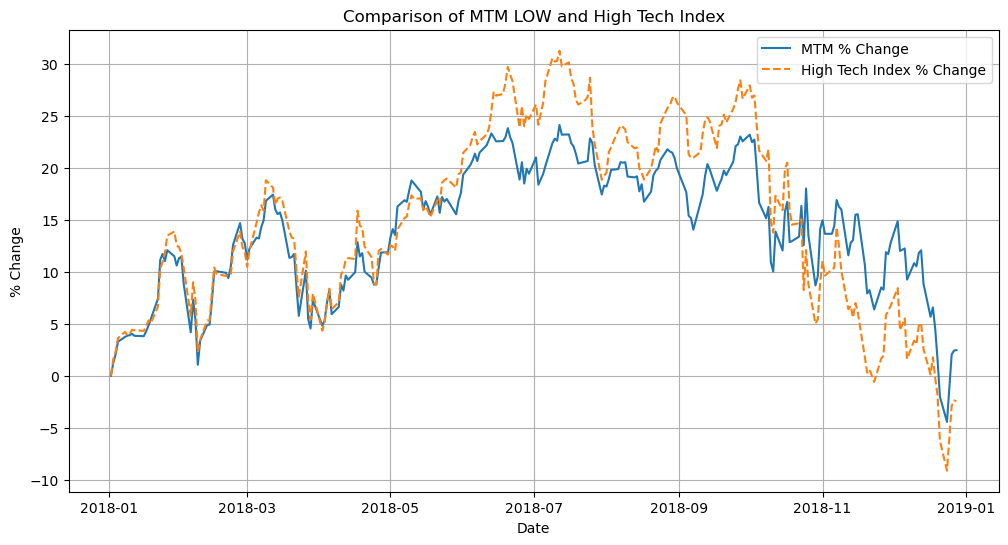

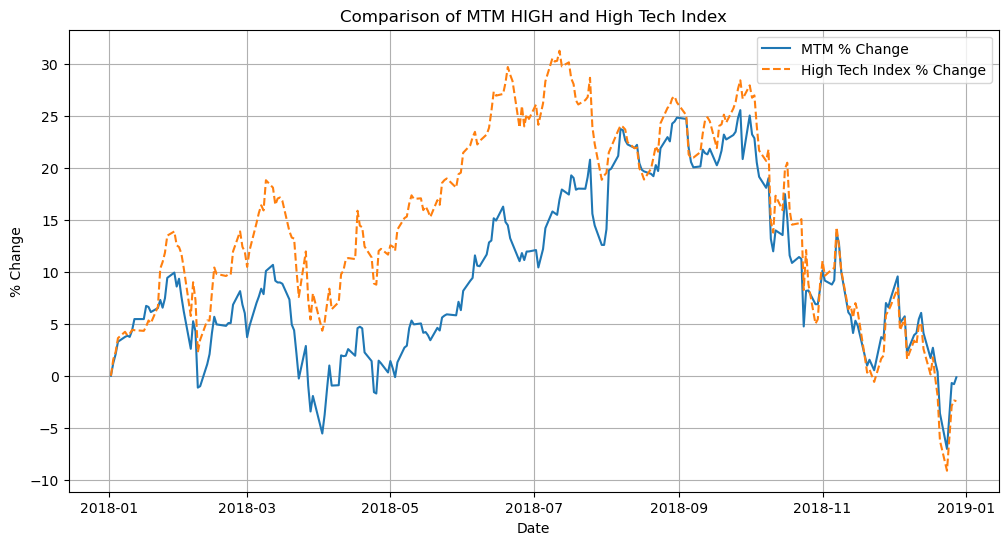

In [ ]:
# Plot the two curves together
plt.figure(figsize=(12, 6))
plt.plot(stocks_df.index, MTM_array_low_percent, label='MTM % Change', linestyle='-')
plt.plot(stocks_df.index, stocks_df['High_Tech_Index_Pct_Change'], label='High Tech Index % Change', linestyle='--')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.title('Comparison of MTM LOW and High Tech Index')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(stocks_df.index, MTM_array_high_percent, label='MTM % Change', linestyle='-')
plt.plot(stocks_df.index, stocks_df['High_Tech_Index_Pct_Change'], label='High Tech Index % Change', linestyle='--')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.title('Comparison of MTM HIGH and High Tech Index')
plt.legend()
plt.grid(True)
plt.show()

8.Download the USD/JPY 2018 historical data at https://finance.yahoo.com/quote/JPY%3DX/history?period1=1514764800&period2=1546300800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true then use the "Close" column as the rate to convert your MTM series from USD to JPY. Plot the two MTM curves. You will need to convert to daily percentage change too.


In [ ]:
import pandas as pd
# Download historical data from Yahoo Finance
# data = yf.download(ticker, start=start_date, end=end_date)
data = pd.read_csv('JPY=X.csv')

# Calculate the MTM in JPY by multiplying with the "Close" column
data['MTM_JPY'] = data['Close']

# Calculate the daily percentage change in MTM
data['MTM_USD_pct_change'] = data['Close'].pct_change() * 100
data['MTM_JPY_pct_change'] = data['MTM_JPY'].pct_change() * 100

In [ ]:
# Plot the two MTM curves
plt.figure(figsize=(12, 6))
print(data['MTM_USD_pct_change'])
plt.plot(data.index, data['MTM_USD_pct_change'], label='MTM USD (%)', color='blue')
plt.plot(data.index, data['MTM_JPY_pct_change'], label='MTM JPY (%)', color='red')
plt.title('MTM in USD and JPY (2018)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid()
plt.show()


In [ ]:
def MTM_low(no_of_days):
    initial_funds = 5000000
    stocks_to_buy = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN']
    funds_per_stock = initial_funds / len(stocks_to_buy)
    selected_stocks = {}
    MTM = 0
    cash_account = 0

    for stock in stocks_to_buy:
        selected_stocks[stock] = funds_per_stock // stocks_df.loc['2018-01-02'][stock + '_Close']
        initial_funds -= (stocks_df.loc['2018-01-02'][stock + '_Close'] * selected_stocks[stock])

    cash_account = initial_funds
    counter = 0
    start_date = '2018-01-02'
    MTM_Low = []

    for date_time in stocks_df_dates:
        date = date_time.date()
        cash_account += calculate_dividend(stocks_df, selected_stocks, str(date))

        if (counter%no_of_days == 0):
            cash_account, selected_stocks = RebalanceStocksLow(stocks_df,selected_stocks,cash_account,start_date,str(date))
    #     print("cash_account is", cash_account)
        MTM = cash_account
        for stock in selected_stocks:
            MTM += selected_stocks[stock] * stocks_df.loc[str(date)][stock + '_Close']

        MTM_Low.append(MTM)
        counter += 1
        start_date = str(date)

    MTM_Low_Array = pd.Series(MTM_Low)
    MTM_max = MTM_Low_Array.iloc[-1]
    return MTM_max

9. change the days interval and find the optimal days interval that maximizes the MTM on 12/31/2018.

In [ ]:
import numpy as np
all_max_mtms = []
for no_of_days in range(1,len(stocks_df_dates)+1):
    all_max_mtms.append(MTM_low(no_of_days))

max_MTMs = pd.Series(all_max_mtms, index=np.arange(1,len(stocks_df_dates)+1))
max_MTM_num_of_days_idx = max_MTMs.idxmax()
overall_max_MTM = max_MTMs.loc[max_MTM_num_of_days_idx]

In [ ]:
print("Optimal days interval to maximize MTM (rebalance low): ", max_MTM_num_of_days_idx)
print("MTM with the optimal days interval is ", overall_max_MTM)

Optimal days interval to maximize MTM (rebalance low):  61
MTM with the optimal days interval is  6138548.390033584


In [ ]:
def MTM_high(no_of_days):
    initial_funds = 5000000
    stocks_to_buy = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN']
    funds_per_stock = initial_funds / len(stocks_to_buy)
    selected_stocks = {}
    MTM = 0
    cash_account = 0

    for stock in stocks_to_buy:
        selected_stocks[stock] = funds_per_stock // stocks_df.loc['2018-01-02'][stock + '_Close']
        initial_funds -= (stocks_df.loc['2018-01-02'][stock + '_Close'] * selected_stocks[stock])

    cash_account = initial_funds
    counter = 0
    start_date = '2018-01-02'
    MTM_High = []

    for date_time in stocks_df_dates:
        date = date_time.date()
        cash_account += calculate_dividend(stocks_df, selected_stocks, str(date))

        if (counter%no_of_days == 0):
            cash_account, selected_stocks = RebalanceStocksHigh(stocks_df,selected_stocks,cash_account,start_date,str(date))
    #     print("cash_account is", cash_account)
        MTM = cash_account
        for stock in selected_stocks:
            MTM += selected_stocks[stock] * stocks_df.loc[str(date)][stock + '_Close']

        MTM_High.append(MTM)
        counter += 1
        start_date = str(date)

    MTM_High_Array = pd.Series(MTM_High)
    MTM_max = MTM_High_Array.iloc[-1]
    return MTM_max

In [ ]:
all_max_mtms = []
for no_of_days in range(1,len(stocks_df_dates)+1):
    all_max_mtms.append(MTM_high(no_of_days))

max_MTMs = pd.Series(all_max_mtms, index=np.arange(1,len(stocks_df_dates)+1))
max_MTM_num_of_days_idx = max_MTMs.idxmax()
overall_max_MTM = max_MTMs.loc[max_MTM_num_of_days_idx]
print("Optimal days interval to maximize MTM (rebalance high): ", max_MTM_num_of_days_idx)
print("MTM with the optimal days interval is ", overall_max_MTM)

Optimal days interval to maximize MTM (rebalance low):  60
MTM with the optimal days interval is  6084191.535512621
